<div style="text-align: right">Forest LeBlanc (fbhleblanc@gmail.com)</div> 

# Basic dataframe analysis Programming Challenge

#### A)
Assemble a dataframe with one row per customer and the following columns:

    - customer_id
    - gender
    - most_recent_order_date
    - order_count (number of orders placed by this customer)
     
   Sort the dataframe by customer_id ascending and display the first 10 rows.

##### Considerations/Assumptions:
- You could toss out the original index which appears in the final dataframe - but I just kept it because having more information is rarely bad. This index, which appears at the left, just corresponds to the index of the most recent order for that customer.

In [51]:
import pandas as pd

# raw dataframe from csv file
df = pd.read_csv("screening_exercise_orders_v201810.csv") 

# group by userid, sort by date
partA = df.sort_values(by=['customer_id', 'date'])



# add number of orders to each unique customer
partA['order_count'] = partA['customer_id'].map((partA['customer_id'].value_counts()).sort_index())
# (partA['customer_id'].value_counts()).sort_index() will count unique occurences of each ID entry and sort by index.
# this is converted with map() to allow duplicates for assigning to the dataframe

# keep only the last row (most recent) for each user
partA = partA.drop_duplicates(subset=['customer_id'],keep='last')

# rename date column to most_recent_order_date
partA = partA.rename(index=str, columns={"date": "most_recent_order_date"})

# get rid of unnecessary columns
partA = partA.drop(columns=['value', 'predicted_gender'])

partA.set_index('customer_id')

# First 10 rows
partA.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
1742,1002,1,2017-02-19 21:35:31,3
4323,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
12953,1005,1,2017-12-16 01:39:27,2
4798,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
12991,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


#### B)
Plot the count of orders per week for the store.

##### Considerations/Assumptions:
 - The first few days of the year wind up belonging to week 52 with the below method. I kept it like this for a few reasons:
     - The dataset doesn't have information for the end of the last week of the year, so for a rough estimate like this I think it's reasonable to basically use last year's data to supplement it as a prediction.
     - You could change this so that the first day of the year is also the first day of each week. This works for 2017, where it's Sunday, but if you perform this for another year it could be any other day. My intuition is that this could skew the data if you're comparing sales per week for two different years, so I'll just stick with the default week window (Mon-Mon).
 - Week 20 has an unusual spike in the number of orders. I'm assuming this is fine -- that's around mid-May, so maybe this data is for a class ring store? Only partly kidding.
 - I used some matplotlib styling because I assume this would be presented to someone unfamiliar with the dataset, as a high-level view of sales per week.
     - I did try to make this look even nicer with some labels and such, but forgot to save and figured it's probably not a big deal anyway.

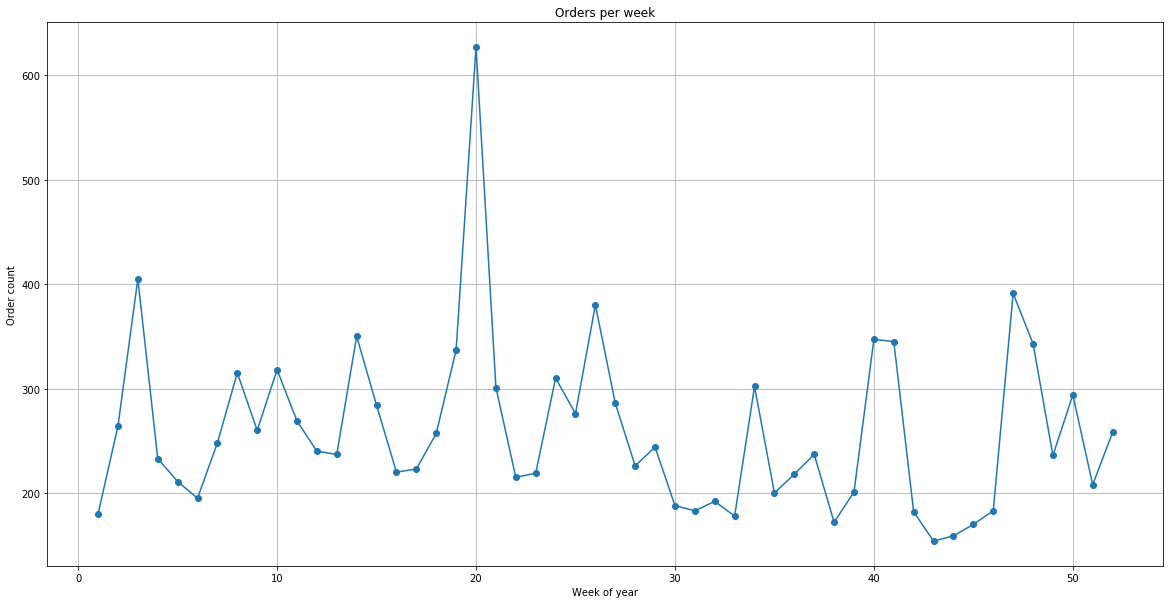

In [32]:
import matplotlib.pyplot as plt

# copy to new dataframe so we're not messing with the original
df2 = df.loc[:]

# you could probably make this a little more readable by doing 'week of xx-xx-xxxx' but I think a basic week number is fine for now
df2["week_number"] = pd.to_datetime(df["date"]).dt.week

# just adds a field for entries per week and allows sequential indexing
df2 = (
    df2
    .groupby("week_number")
    .count()
    .reset_index()
)

# the element count, now in the 'value' column, gets renamed
df2 = df2.rename(index=str, columns={"value": "orders"})

# figure styling...
plt.figure(figsize=(20,10)) 
plt.plot( 'week_number', 'orders', data=df2, linestyle='-', marker='o')
plt.ylabel('Order count')
plt.xlabel('Week of year')
plt.grid(True)
plt.title('Orders per week')

plt.show()



#### C)
Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [33]:
partC = df.groupby(['gender'])['value'].mean()

print("Mean order value of gender 0:",partC[0])
print("'' of gender 1:",partC[1])

#I got 363.89 for gender 0 and 350.71 for gender 1. I don't think the difference is significant.

Mean order value of gender 0: 363.89000591803506
'' of gender 1: 350.70836114422


#### D)
Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

##### Considerations/Assumptions:
I'm assuming we just want a very basic output here for quick reference, and that a more in-depth analysis would take place wherever the actual classification algorithm is implemented.

In [34]:
df_confusion = pd.crosstab(df['gender'], df['predicted_gender'], rownames=['Actual Gender'], colnames=['Predicted Gender'], margins=True)
print (df_confusion)

# just curious...
print("Gender 1 accuracy % (TP): ", df_confusion[1][1]/(df_confusion[1][1]+df_confusion[0][1]) * 100)
print("Gender 0 accuracy % (TN): ", df_confusion[0][0]/(df_confusion[0][0]+df_confusion[1][0]) * 100)

# It seems the model isn't very accurate, but more specifically, it has a bias(?) toward gender 1.

Predicted Gender     0     1    All
Actual Gender                      
0                 3349  3410   6759
1                 1463  5249   6712
All               4812  8659  13471
Gender 1 accuracy % (TP):  78.20321811680571
Gender 0 accuracy % (TN):  49.5487498150614


#### E)
Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.

- It may sound wacky, but my favorite tool is very much a non-technical one: mindfulness. The best tools have many uses, and I often find the act of meditation and contemplation to be immensely helpful with all aspects of life. In a programming context, it helps me approach a problem with fresh eyes whenever I feel like I have tunnel vision.